In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.width', 150)

In [ ]:
df_original = pd.read_csv("fraudTrain.csv")
df=df_original

In [ ]:
print(df.head())

   Unnamed: 0 trans_date_trans_time            cc_num                            merchant       category    amt      first     last gender  \
0           0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   4.97   Jennifer    Banks      F   
1           1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos 107.23  Stephanie     Gill      F   
2           2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment 220.11     Edward  Sanchez      M   
3           3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport  45.00     Jeremy    White      M   
4           4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos  41.96      Tyler   Garcia      M   

                         street  ...   lat    long  city_pop                                job         dob                         trans_num  \
0 

In [ ]:
df = df.drop(columns=["Unnamed: 0"])

print("Nombre de lignes et colonnes : ")
print(df.shape)
print("\n",df.isnull().sum().sum(), "missing values found\n")
print(df.info(),"\n")

Nombre de lignes et colonnes : 
(1296675, 22)

 0 missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  

We have a lot of strings (object)

In [ ]:
# This dataset is based on credit card transaction from 1st January 2019 to 30 December of 2020. We want to have the age of the account owner during the transaction
# (with a precision of +/- 1 year since we will calculate it from 1st of January 2020).
from datetime import datetime
df["dob"] = pd.to_datetime(df["dob"])
df["age"] = (pd.Timestamp("2020-01-01") - df["dob"]).dt.days // 365
df = df.drop(columns=["dob"])

In [ ]:
import plotly.express as px
if 'trans_date_trans_time' not in df.columns:
    print("Erreur : La colonne 'trans_date_trans_time' est absente.")
else:

    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    daily_frauds = df[df['is_fraud'] == 1].set_index('trans_date_trans_time').resample('D').size()


    fig = px.line(
        x=daily_frauds.index,
        y=daily_frauds.values,
        title="Évolution du nombre de fraudes par jour",
        labels={'x': 'Date', 'y': 'Nombre de fraudes'})
    fig.show()

In [ ]:
import plotly.express as px


if 'month' not in df.columns:

    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['month'] = df['trans_date_trans_time'].dt.month

frauds_per_month = df[df['is_fraud'] == 1].groupby('month').size().reset_index(name='count')

fig5 = px.bar(
    frauds_per_month,
    x='month',
    y='count',
    title="Nombre de fraudes par mois",
    labels={'month': 'Mois', 'count': 'Nombre de fraudes'},
    text='count'  # Affiche le chiffre au-dessus de la barre
)

# Amélioration visuelle
fig5.update_traces(textposition='outside')
fig5.update_layout(xaxis=dict(tickmode='linear', tick0=1, dtick=1)) # Affiche tous les mois (1 à 12)

fig5.show()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


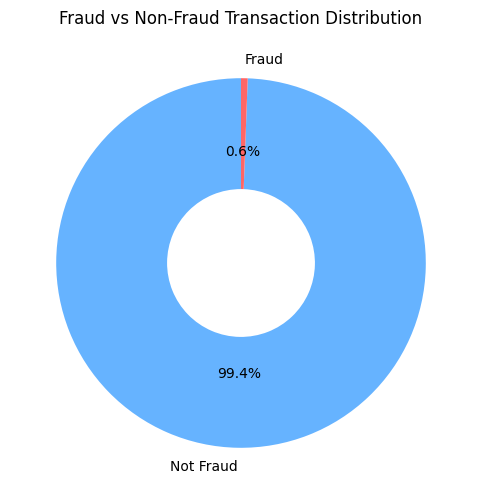

In [ ]:
# evaluate oversampling/ undersampling
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each class
print(df['is_fraud'].value_counts())

# Draw the chart
counts = df['is_fraud'].value_counts()
labels = ['Not Fraud', 'Fraud']
colors = ['#66b3ff', '#ff6666']

# Create pie chart with a hole in the middle (donut)
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'width':0.6})
plt.title('Fraud vs Non-Fraud Transaction Distribution')
plt.show()

In [ ]:
for col in df.columns:
    print(df[col].value_counts().head(5),"\n")

trans_date_trans_time
2019-04-22 16:02:01    4
2020-06-02 12:47:07    4
2020-06-01 01:37:47    4
2020-05-11 14:27:33    3
2020-05-29 18:21:24    3
Name: count, dtype: int64 

cc_num
4512828414983801773    3123
571365235126           3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
Name: count, dtype: int64 

merchant
fraud_Kilback LLC    4403
fraud_Cormier LLC    3649
fraud_Schumm PLC     3634
fraud_Kuhn LLC       3510
fraud_Boyer PLC      3493
Name: count, dtype: int64 

category
gas_transport    131659
grocery_pos      123638
home             123115
shopping_pos     116672
kids_pets        113035
Name: count, dtype: int64 

amt
1.14    542
1.04    538
1.25    535
1.02    533
1.01    523
Name: count, dtype: int64 

first
Christopher    26669
Robert         21667
Jessica        20581
James          20039
Michael        20009
Name: count, dtype: int64 

last
Smith        28794
Williams     23605
Davis        21910
Johnson      20034
Rodriguez    1

In [ ]:
# We drop the column "trans_num" because it's just an identifiant for the transaction and it doesn't tell us anything on it
# We drop the columns "first" and "last" that are just the names of the clients because we have no usable informations with the names or at least no
# usable informations that we can't find in other columns (for exemple gender)
df = df.drop(columns=["trans_num","first","last"])

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month
cols_to_drop_final = ['trans_date_trans_time']
df=df.drop(columns=cols_to_drop_final)

In [ ]:
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,month,hour,day_of_week
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,...,3495,"Psychologist, counselling",1325376018,36.01,-82.05,0,31,1,0,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,...,149,Special educational needs teacher,1325376044,49.16,-118.19,0,41,1,0,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,...,4154,Nature conservation officer,1325376051,43.15,-112.15,0,57,1,0,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,...,1939,Patent attorney,1325376076,47.03,-112.56,0,53,1,0,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,...,99,Dance movement psychotherapist,1325376186,38.67,-78.63,0,33,1,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['gender'] = df['gender'].map({'F': 0, 'M': 1})
df = pd.get_dummies(df, columns=['category'], prefix='cat', drop_first=True)


In [ ]:
le = LabelEncoder()
df['merchant'] = le.fit_transform(df['merchant'].astype(str))
df['job'] = le.fit_transform(df['job'].astype(str))

In [ ]:
import numpy as np

def haversine_vectorized(lat1, lon1, lat2, lon2):

    # Radius of earth
    R = 6371.0

    # degrees in rads
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Harvesine Formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c


df['distance_km'] = haversine_vectorized(df['lat'], df['long'], df['merch_lat'], df['merch_long'])
print(df[['lat', 'long', 'merch_lat', 'merch_long', 'distance_km']].head())

    lat    long  merch_lat  merch_long  distance_km
0 36.08  -81.18      36.01      -82.05        78.60
1 48.89 -118.21      49.16     -118.19        30.21
2 42.18 -112.26      43.15     -112.15       108.21
3 46.23 -112.11      47.03     -112.56        95.67
4 38.42  -79.46      38.67      -78.63        77.56


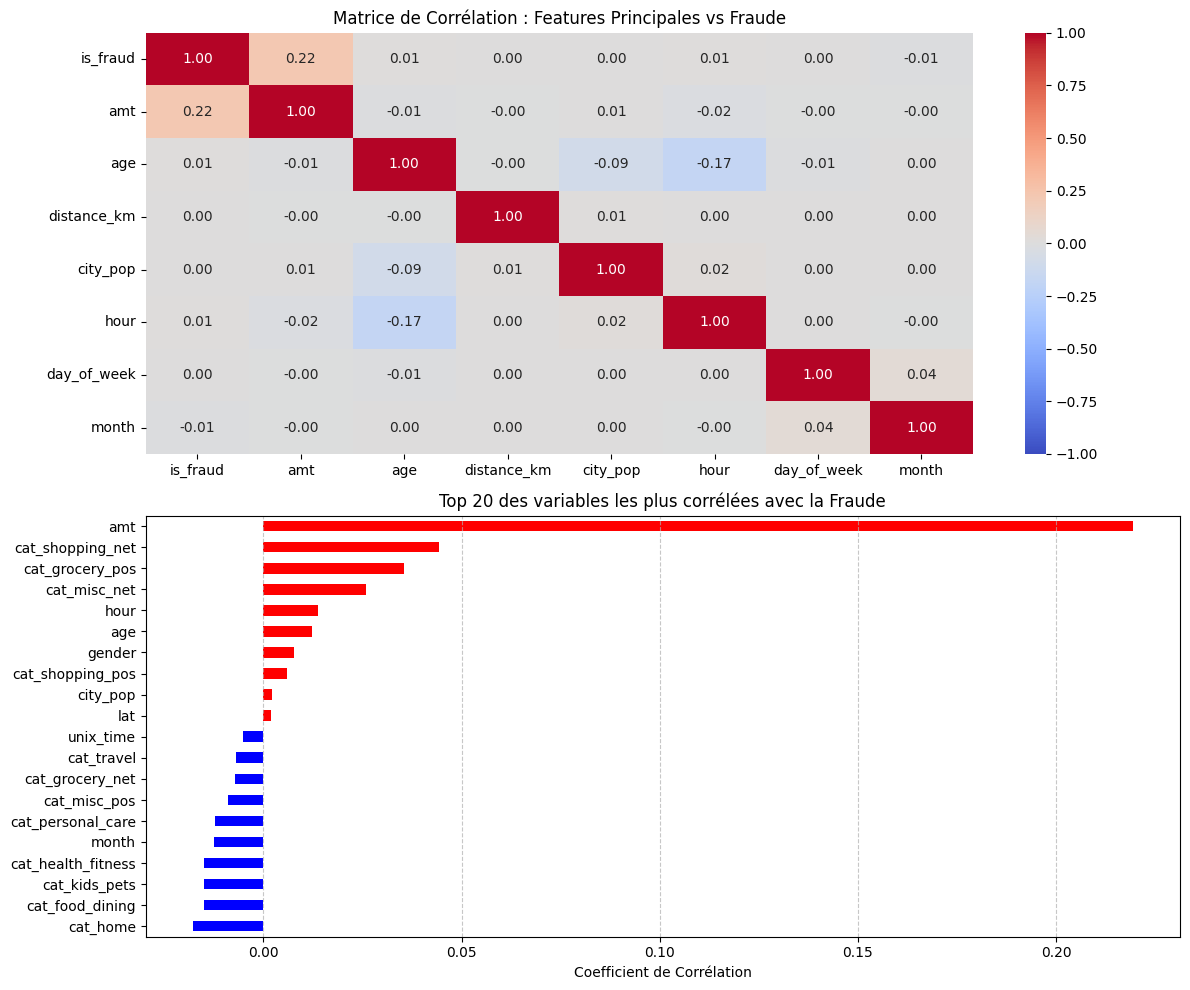

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 10))
cols_to_analyze = ['is_fraud', 'amt', 'age', 'distance_km', 'city_pop', 'hour', 'day_of_week', 'month']
existing_cols = [c for c in cols_to_analyze if c in df.columns]
corr_matrix = df[existing_cols].corr()
plt.subplot(2, 1, 1)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation : Features Principales vs Fraude')



plt.subplot(2, 1, 2)
correlations = df.corr(numeric_only=True)['is_fraud'].drop('is_fraud').sort_values()
top_correlations = pd.concat([correlations.head(10), correlations.tail(10)])
top_correlations.plot(kind='barh', color=(top_correlations > 0).map({True: 'r', False: 'b'}))
plt.title('Top 20 des variables les plus corrélées avec la Fraude')
plt.xlabel('Coefficient de Corrélation')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
cols_to_scale = ['amt', 'age', 'distance_km', 'city_pop']
scaler = RobustScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define X (Features) and y (Target)
# We drop 'is_fraud' from X because that's the answer we want to predict
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# 2. Split into Train and Test sets (80% for training, 20% for testing)
# stratify=y is important here to keep the same proportion of frauds in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split successfully!")
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Data split successfully!
Training shape: (1037340, 33)
Testing shape: (259335, 33)
